## Dependencies

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [128]:
titanic_data=pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
titanic_data.info()
# titanic_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [130]:
test_data.info()
# test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Analayzing Data

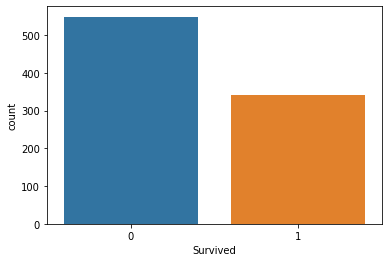

In [131]:
sns.countplot(x="Survived", data=titanic_data)

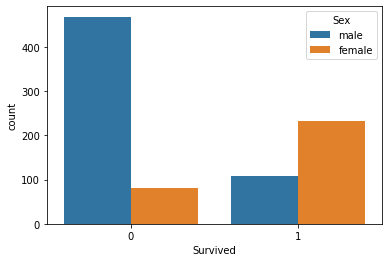

In [132]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

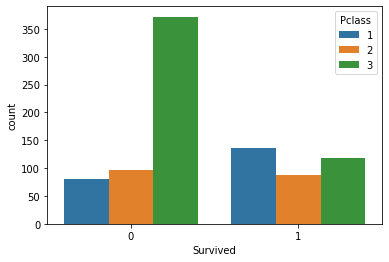

In [133]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

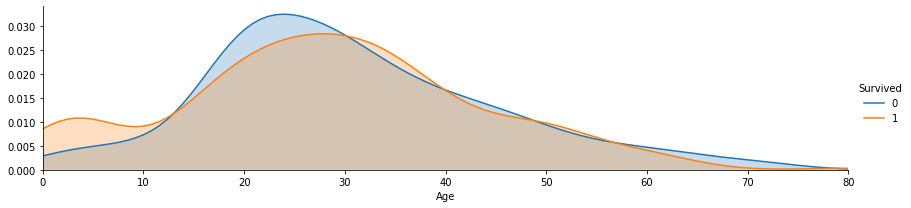

In [134]:
facet = sns.FacetGrid(titanic_data, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.show() 

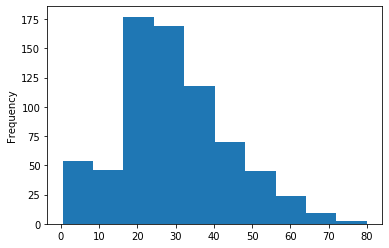

In [135]:
titanic_data["Age"].plot.hist()

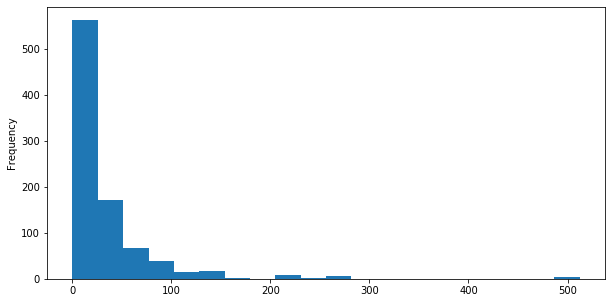

In [136]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

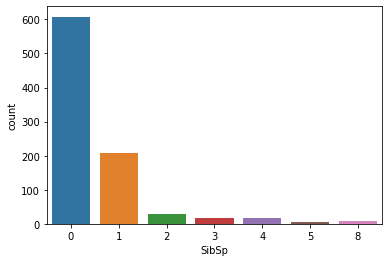

In [137]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [138]:
titanic_data.isnull().head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False


In [139]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

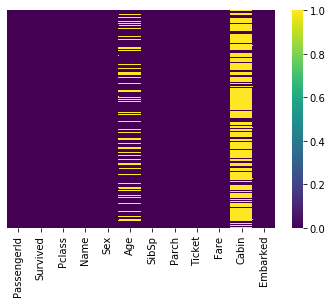

In [141]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

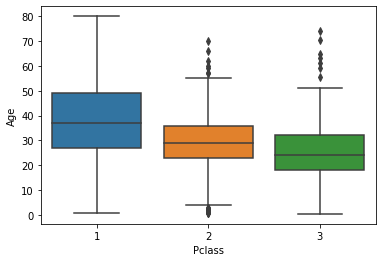

In [142]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [143]:
 # fill missing age with median age for each title (Mr, Mrs, Miss, Others)
 age_mean = titanic_data['Age'].mean()
 age_mean

29.69911764705882

In [145]:
 titanic_data['Age']=titanic_data['Age'].fillna(age_mean)
 titanic_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [146]:
titanic_data.drop("Cabin", axis= 1, inplace=True)

In [147]:
test_data.drop("Cabin", axis= 1, inplace=True)
#test_data.dropna(inplace=True)

In [97]:
test_data

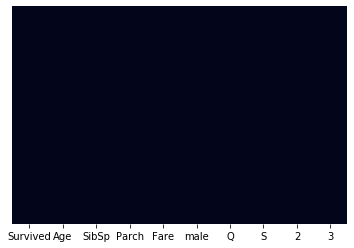

In [98]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

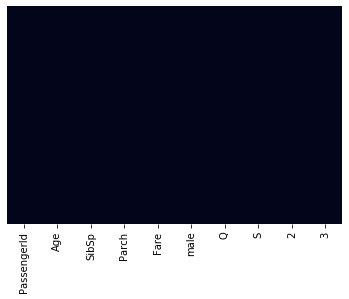

In [99]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [100]:
test_data.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
2              0
3              0
dtype: int64

In [126]:
pd.get_dummies(test_data["Sex"]).head()
pd.get_dummies(titanic_data["Sex"]).head()

KeyError: 'Sex'

In [102]:
sex=pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex_test=pd.get_dummies(test_data["Sex"], drop_first=True)
sex.head()

KeyError: 'Sex'

In [103]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark_test=pd.get_dummies(test_data["Embarked"],drop_first=True)
embark.head()

KeyError: 'Embarked'

In [104]:
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head()
Pcl_test=pd.get_dummies(test_data["Pclass"],drop_first=True)
Pcl_test.head()

KeyError: 'Pclass'

In [105]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)
titanic_data.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0


In [106]:
test_data=pd.concat([test_data,sex_test,embark_test,Pcl_test],axis=1)
test_data.head(2)

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1,0,0,1,0,1


In [107]:
titanic_data.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass"],axis=1, inplace=True)
titanic_data.head()

KeyError: "['Sex' 'Embarked' 'PassengerId' 'Name' 'Ticket' 'Pclass'] not found in axis"

In [108]:
test_data.drop(["Sex","Embarked","Name","Ticket","Pclass"],axis=1, inplace=True)
test_data.head(2)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket' 'Pclass'] not found in axis"

In [109]:
# test_data.head()
train_data = titanic_data.drop('Survived', axis=1)
target = titanic_data['Survived']

train_data.shape, target.shape

((891, 14), (891,))

In [110]:
test_data.shape

(331, 15)

In [111]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
train_data.isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
male     0
Q        0
S        0
2        0
3        0
male     0
Q        0
S        0
2        0
3        0
dtype: int64

In [113]:
clf = KNeighborsClassifier(n_neighbors = 9)
scoring = 'accuracy'
knn_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(knn_score)


[0.74444444 0.76404494 0.6741573  0.6741573  0.71910112 0.73033708
 0.71910112 0.74157303 0.71910112 0.75280899]


In [114]:
# kNN Score
knn=round(np.mean(knn_score)*100, 2)
knn

72.39

In [115]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
decT_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=2, scoring=scoring)
print(decT_score)

[0.74444444 0.79775281 0.78651685 0.73033708 0.74157303 0.83146067
 0.76404494 0.76404494 0.73033708 0.78651685]


In [116]:
# decision tree Score
decT=round(np.mean(decT_score)*100, 2)
decT

76.77

In [117]:
clf = RandomForestClassifier(n_estimators=9)
scoring = 'accuracy'
RF_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(RF_score)

[0.81111111 0.80898876 0.76404494 0.78651685 0.79775281 0.85393258
 0.79775281 0.78651685 0.78651685 0.82022472]


In [118]:
# Random Forest Score
RF=round(np.mean(RF_score)*100, 2)
RF

80.13

In [119]:
clf = GaussianNB()
scoring = 'accuracy'
GNB_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(GNB_score)

[0.81111111 0.79775281 0.73033708 0.76404494 0.75280899 0.75280899
 0.78651685 0.83146067 0.78651685 0.80898876]


In [120]:
# Naive Bayes Score
GNB=round(np.mean(GNB_score)*100, 2)
GNB

78.22

In [121]:
clf = SVC()
scoring = 'accuracy'
SVC_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(SVC_score)

C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

[0.68888889 0.79775281 0.69662921 0.70786517 0.74157303 0.75280899
 0.73033708 0.70786517 0.74157303 0.6741573 ]


C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [122]:
SVC=round(np.mean(SVC_score)*100,2)
SVC

72.39

In [123]:
test_data.head(1)


,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1,1,1,0,0,1


In [124]:
train_data.head(1)

,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,22.0,1,0,7.25,1,0,1,0,1,1,0,1,0,1


In [125]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [SVC, knn,  
              RF, GNB, decT]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
80.13,Random Forest
78.22,Naive Bayes
76.77,Decision Tree
72.39,Support Vector Machines
72.39,KNN
